In [1]:
import pandas as pd
import numpy as np 
import json
import copy

In [2]:
fields = ['Chemical Engineering', 'Architecture', 'Psychology',
       'General Engineering', 'Sociology',
       'Electrical & Electronic Engineering',
       'Geology, Environmental, Earth & Marine Sciences', 'Computer Science',
       'Chemistry', 'Accounting & Finance', 'Art, Performing Arts & Design',
       'Biological Sciences',
       'Politics & International Studies (incl Development Studies)',
       'Civil Engineering', 'Agriculture & Forestry', 'Law',
       'Languages, Literature & Linguistics', 'Communication & Media Studies',
       'Mechanical & Aerospace Engineering', 'Economics & Econometrics',
       'Medicine & Dentistry', 'Physics & Astronomy', 'Geography',
       'History, Philosophy & Theology', 'Mathematics & Statistics',
       'Business & Management', 'Other Health', 'Archaeology', 'Education',
       'Veterinary Science', 'Sport Science']

score_threshold = [80.0, 65.0, 50.0]
salary_threshold = [100000.0, 75000.0, 50000.0]
regions = ['West', 'South', 'Northeast', 'Midwest']
color_map = {regions[0]: 'red', regions[1]: 'green', regions[2]: 'blue', regions[3]: 'yellow'}
np.random.seed(1000)

class DataStore():
    salaries=None
    regions=None
    names=None
    scores=None
    sizes=None
    subjects=None
    subs_data=None
dataStore=DataStore()


In [3]:
csv = pd.read_csv('usUni.csv')
census_region = pd.read_csv('us census bureau regions and divisions.csv')

In [4]:
csv.keys()

Index(['Unnamed: 0', 'rank_order', 'rank', 'name', 'scores_overall',
       'scores_overall_rank', 'scores_resources', 'scores_resources_rank',
       'scores_engagement', 'scores_engagement_rank', 'scores_outcomes',
       'scores_outcomes_rank', 'scores_environment', 'scores_environment_rank',
       'nid', 'location', 'stats_fees_oos', 'stats_board', 'stats_salary',
       'Chemical Engineering', 'Architecture', 'Psychology',
       'General Engineering', 'Sociology',
       'Electrical & Electronic Engineering',
       'Geology, Environmental, Earth & Marine Sciences', 'Computer Science',
       'Chemistry', 'Accounting & Finance', 'Art, Performing Arts & Design',
       'Biological Sciences',
       'Politics & International Studies (incl Development Studies)',
       'Civil Engineering', 'Agriculture & Forestry', 'Law',
       'Languages, Literature & Linguistics', 'Communication & Media Studies',
       'Mechanical & Aerospace Engineering', 'Economics & Econometrics',
       'Me

In [5]:
def preproccess(key_sort ="scores_overall", ascending=False):
    raw = csv.sort_values(key_sort, ascending=ascending, inplace=False)
    raw = raw.dropna()
    data = pd.DataFrame().from_dict({'name': raw.name})
    data[fields] = raw[fields]
    data['salary'] = raw.stats_salary.str.replace(',', '.')
    data['salary'] = data.salary.str.replace('$', '')
    data['salary'] = data['salary'].astype(np.float32)
    data['salary'] = data['salary'] * 1000.0
    data[fields] = raw[fields]
    uni_region = [census_region[census_region.State == lo].Region for lo in raw.location]
    uni_region = [x.values[0] for x in uni_region]
    data['region'] = uni_region
    scores = []
    for c in raw.scores_overall:
        try:
            result = np.float16(c)
            scores.append(result)
        except:
            a = str(c).split('-')
            result = np.float16(a[0]) + np.float16(a[1])
            scores.append(result * 0.5)
    data['score'] = scores
    return data


In [6]:
def extract_to_store(key_sort ="scores_overall", ascending=False, nums=500):
    data = preproccess(key_sort, ascending)
    data = data.iloc[0:nums,:]
    dataStore.names = data.name.to_list()
    dataStore.regions = data.region.to_list()
    dataStore.salaries = data.salary.to_list()
    dataStore.scores = data.score.to_list()
    idx = np.random.randint(low=1, high=len(fields), size=5)
    dataStore.subjects = [fields[i] for i in idx]
    dataStore.subs_data = {}
    for sub in dataStore.subjects:
        dataStore.subs_data[sub] = data[sub].astype(np.int16).to_list()
    #return dataStore

In [7]:
def transform(input, threshold, newValue, inplace=False):
    if inplace:
        data = input
    else:
        data = copy.deepcopy(input)
    for d in range(len(data)):
        if data[d] > threshold[0]:
            data[d] = newValue[0]
            continue
        if data[d] > threshold[1]:
            data[d] = newValue[1]
            continue
        else:
            data[d] = newValue[2]
    return data

In [8]:
def json_over_score_salary_region(nums_of_items=250, ascending=False):
    extract_to_store(nums_of_items, ascending)
    json_data = {'name': "data", "children": []}
    rank_1 = {"name": "rank_1", "children": []}
    rank_2 = {"name": "rank_2", "children": []}
    sizes = transform(dataStore.salaries, salary_threshold, [1600, 800, 100])
    for index in range(nums_of_items):
        if dataStore.scores[index] > score_threshold[0]:
            rank_1['children'].append({'name':dataStore.names[index], 'size': sizes[index]})
            continue
        if dataStore.scores[index] > score_threshold[1]:
            rank_2['children'].append({'name':dataStore.names[index], 'size': sizes[index]})
        else:
            json_data['children'].append({'name': dataStore.names[index], 'size': sizes[index]})
    rank_2['children'].append(rank_1)
    json_data['children'].append(rank_2)
    return json_data
        


In [9]:
def json_over_score(nums_of_items=200, ascending=False):
    extract_to_store(nums_of_items, ascending)
    json_data = {'name': "data", "children": []}
    sizes = transform(dataStore.scores, score_threshold, [1600, 800, 100])
    for index in range(nums_of_items):
        json_data['children'].append({'name': dataStore.names[index], 'size': sizes[index]})
    return json_data

In [10]:
def json_over_score_region(nums_of_items=200, ascending=False):
    extract_to_store(nums_of_items, ascending)
    json_data = {'name': "data", "children": []}
    sizes = transform(dataStore.scores, score_threshold, [1600, 800, 100])
    colors = [color_map[c] for c in dataStore.regions]
    for index in range(nums_of_items):
        json_data['children'].append({'name': dataStore.names[index], 'size': sizes[index], 'color': colors[index]})
    return json_data

In [11]:
def json_over_score_subject(nums_of_items=200, ascending=False):
    extract_to_store(nums_of_items, ascending)
    json_data = {'name': "data", "children": []}
    colors = transform(dataStore.scores, score_threshold, ["green", "yellow", "white"])
    sizes = transform(dataStore.salaries, salary_threshold, [1600, 800, 100])
    for sub in dataStore.subjects:
        subj = {
            "name": sub,
            "children":[]
        }
        for idx in range(nums_of_items):
            if dataStore.subs_data[sub][idx]:
                subj["children"].append(
                    {
                        "name": dataStore.names[idx],
                        "size": sizes[idx],
                        "color": colors[idx]
                    })
        json_data['children'].append(subj)
    return json_data

In [12]:
extract_to_store(key_sort="stats_salary")

In [13]:
colors = [color_map[c] for c in dataStore.regions]
data_to_plot = pd.DataFrame({'salary': dataStore.salaries, 'color': colors, "name": dataStore.names})

In [14]:
import matplotlib.pyplot as plt

In [15]:
data_to_plot

,salary,color,name
0,96033.0,blue,Massachusetts Institute of Technology
1,93067.0,blue,University of the Sciences
2,92033.0,blue,Harvard University
3,91400.0,blue,Babson College
4,89200.0,green,Georgetown University
...,...,...,...
495,42767.0,blue,The New School
496,42767.0,yellow,Capital University
497,42767.0,green,Sam Houston State University
498,42733.0,yellow,Alma College


Text(0.85, 0.79, 'Midwest Region')

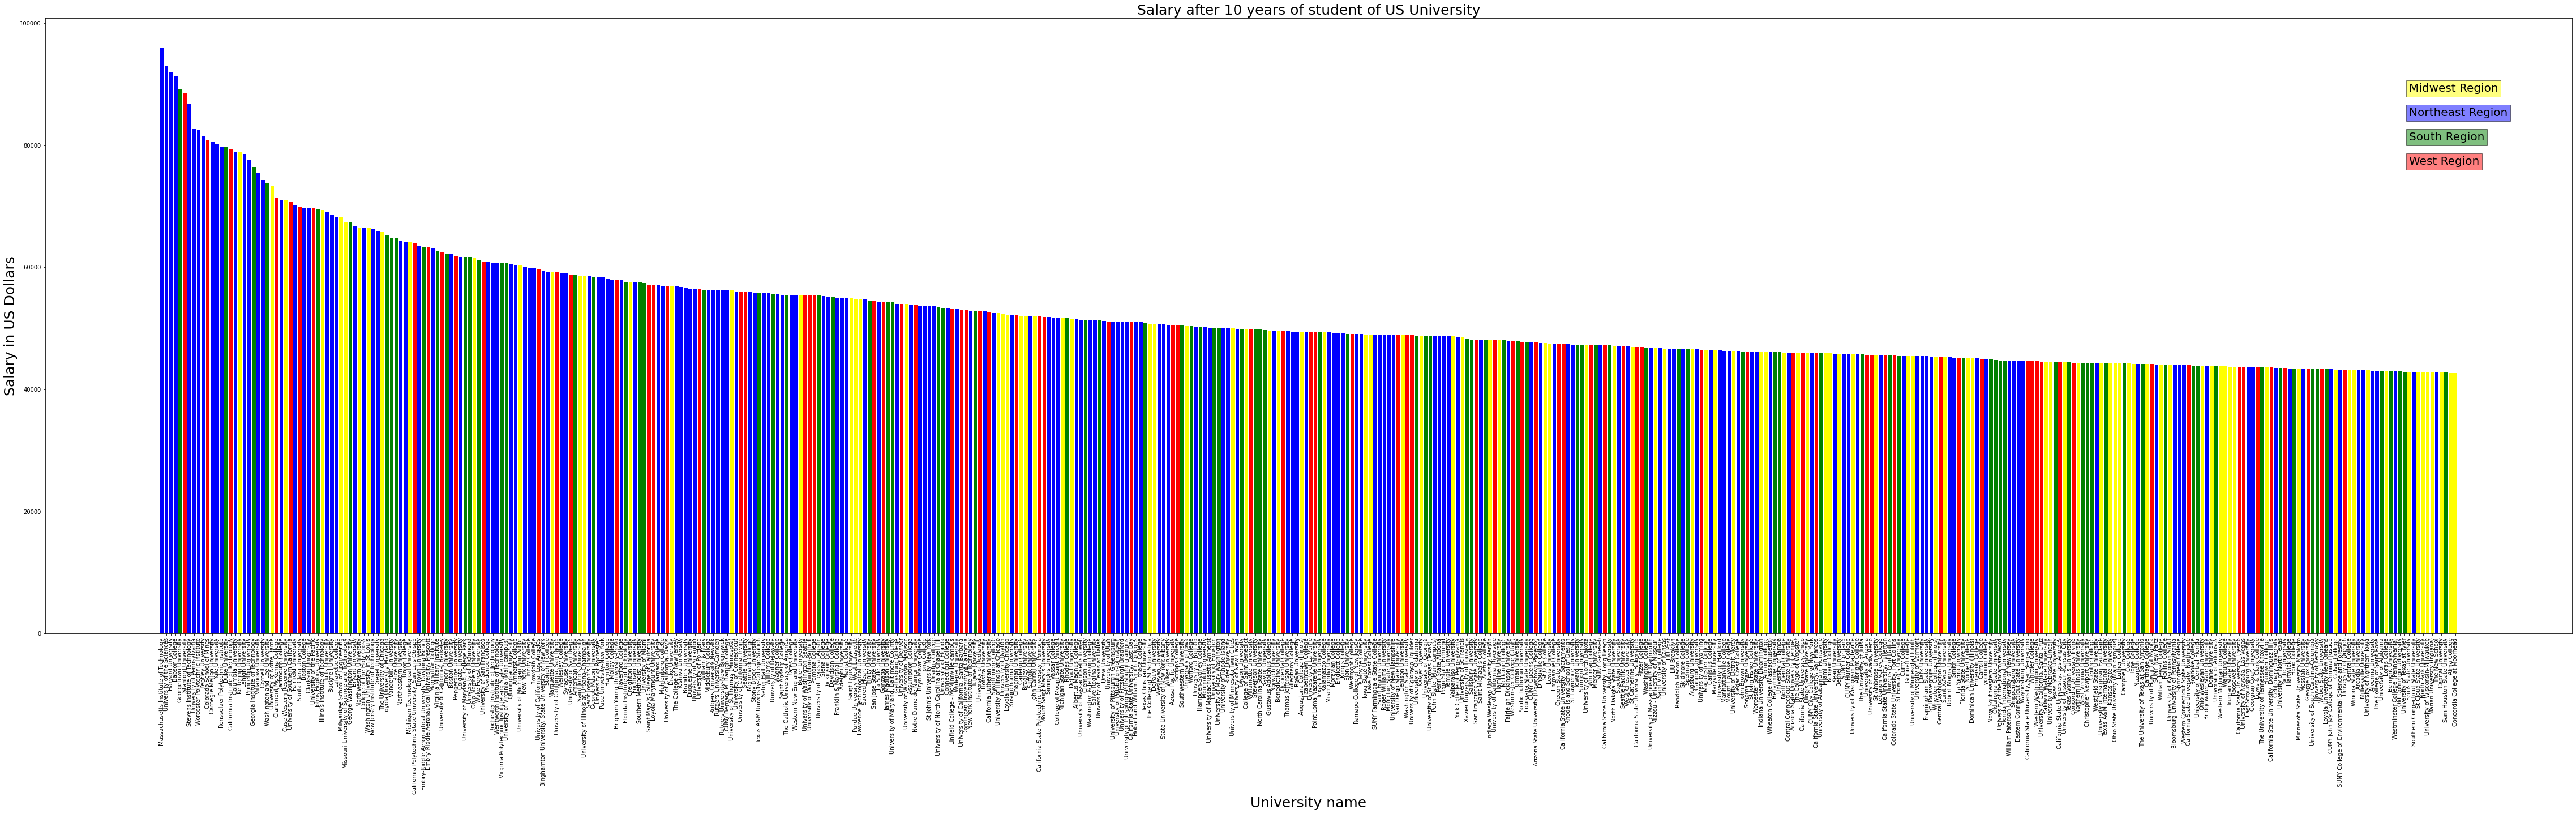

In [17]:
plt.figure(figsize=(80,20))
# bar plot with matplotlib
plt.bar('name', 'salary',data=data_to_plot, color=data_to_plot.color)
plt.xlabel("University name", size=25)
plt.xticks(rotation=90)
plt.ylabel("Salary in US Dollars", size=25)
plt.title("Salary after 10 years of student of US University", size=25)
plt.figtext(0.85, 0.7, "West Region", ha="left", fontsize=20, bbox={"facecolor":"red", "alpha":0.5, "pad":5})
plt.figtext(0.85, 0.73, "South Region", ha="left", fontsize=20, bbox={"facecolor":"green", "alpha":0.5, "pad":5})
plt.figtext(0.85, 0.76, "Northeast Region", ha="left", fontsize=20, bbox={"facecolor":"blue", "alpha":0.5, "pad":5})
plt.figtext(0.85, 0.79, "Midwest Region", ha="left", fontsize=20, bbox={"facecolor":"yellow", "alpha":0.5, "pad":5})
#plt.savefig("bar_chart_salary_after_10_years_of_us_student.png")